In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import pingouin as pg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# Load dataset
df = sns.load_dataset('titanic')

In [ ]:
# number of category is grestrer than 2 than one-hot encoding
dict_sex = {'male':0, 'female':1}
dict_embarked = {'S':0, 'C':1, 'Q': 2}
dict_class = {'First': 1, 'Second': 2, 'Third': 3}
dict_who = {'man': 0, 'woman': 1, 'child': 2}
dict_deck = {'A': 0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
dict_embark_town = {'Southampton':0, 'Cherbourg':1, 'Queenstown':2}
dict_yes_no = {'yes': 1, 'no': 0}

df.sex = df.sex.map(dict_sex)
df.embarked = df.embarked.map(dict_embarked)
df['class'] = df['class'].map(dict_class)
df.who = df.who.map(dict_who)

df.adult_male[df.adult_male == True] = 1
df.adult_male[df.adult_male == False] = 0

df.deck = df.deck.map(dict_deck)
df.embark_town = df.embark_town.map(dict_embark_town)
df.alive = df.alive.map(dict_yes_no)

df.alone[df.alone == True] = 1
df.alone[df.alone == False] = 0

In [ ]:
df.isna().sum()

In [5]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df.age.to_numpy().reshape(-1, 1))

df.age = imp_median.transform(df.age.to_numpy().reshape(-1, 1))

In [6]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_freq.fit(df.deck.to_numpy().reshape(-1, 1))

df.deck = imp_freq.transform(df.deck.to_numpy().reshape(-1, 1))

In [7]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
y = df.alive
X = df.drop(columns=['alive'])

In [10]:
X

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,0,22.0,1,0,7.2500,0.0,3,0,1.0,2.0,0.0,0.0
1,1,1,1,38.0,1,0,71.2833,1.0,1,1,0.0,2.0,1.0,0.0
2,1,3,1,26.0,0,0,7.9250,0.0,3,1,0.0,2.0,0.0,1.0
3,1,1,1,35.0,1,0,53.1000,0.0,1,1,0.0,2.0,0.0,0.0
4,0,3,0,35.0,0,0,8.0500,0.0,3,0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,2,0,1.0,2.0,0.0,1.0
887,1,1,1,19.0,0,0,30.0000,0.0,1,1,0.0,1.0,0.0,1.0
888,0,3,1,28.0,1,2,23.4500,0.0,3,1,0.0,2.0,0.0,0.0
889,1,1,0,26.0,0,0,30.0000,1.0,1,0,1.0,2.0,1.0,1.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [25]:
Cs = [20, 30, 40, 50]
gammas = [0.001, 0.01, 0, 10]
kernels= ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels }

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   13.8s finished


{'C': 20, 'gamma': 0.001, 'kernel': 'linear'}

In [26]:
print(grid_search.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test,y_test))

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
The mean accuracy of the model is: 1.0


In [37]:
X_test.shape

(267, 14)

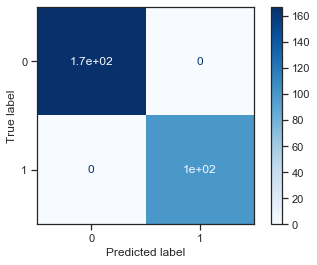

In [38]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, X_test, y_test, display_labels=[0 , 1], cmap=plt.cm.Blues)

# One-hot-encoding

In [39]:
# Load dataset
df = sns.load_dataset('titanic')

In [40]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df.age.to_numpy().reshape(-1, 1))

df.age = imp_median.transform(df.age.to_numpy().reshape(-1, 1))

imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_freq.fit(df.deck.to_numpy().reshape(-1, 1))

df.deck = imp_freq.transform(df.deck.to_numpy().reshape(-1, 1))

In [41]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [42]:
df = df.dropna()

In [43]:
dict_sex = {'male':0, 'female':1}
dict_who = {'man': 0, 'woman': 1, 'child': 2}
dict_yes_no = {'yes': 1, 'no': 0}

df.adult_male[df.adult_male == True] = 1
df.adult_male[df.adult_male == False] = 0
df.alone[df.alone == True] = 1
df.alone[df.alone == False] = 0
df.alive = df.alive.map(dict_yes_no)
df.sex = df.sex.map(dict_sex)
df.who = df.who.map(dict_who)

In [44]:
y = df.alive
X = df.drop(columns=['alive'])

In [45]:
X

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,0,1.0,C,Southampton,0.0
1,1,1,1,38.0,1,0,71.2833,C,First,1,0.0,C,Cherbourg,0.0
2,1,3,1,26.0,0,0,7.9250,S,Third,1,0.0,C,Southampton,1.0
3,1,1,1,35.0,1,0,53.1000,S,First,1,0.0,C,Southampton,0.0
4,0,3,0,35.0,0,0,8.0500,S,Third,0,1.0,C,Southampton,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,0,1.0,C,Southampton,1.0
887,1,1,1,19.0,0,0,30.0000,S,First,1,0.0,B,Southampton,1.0
888,0,3,1,28.0,1,2,23.4500,S,Third,1,0.0,C,Southampton,0.0
889,1,1,0,26.0,0,0,30.0000,C,First,0,1.0,C,Cherbourg,1.0


In [46]:
# How to get dummies from pandas
X = pd.get_dummies(X, columns=['deck', 'class', 'embarked', 'embark_town'])

In [48]:
X.shape

(889, 26)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [51]:
Cs = [20, 30, 40, 50]
gammas = [0.001, 0.01, 0, 10]
kernels= ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels }

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   14.7s finished


{'C': 20, 'gamma': 0.001, 'kernel': 'linear'}

In [52]:
print(grid_search.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test,y_test))

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
The mean accuracy of the model is: 1.0
